In [19]:
import numpy as np
import pandas as pd
import h5py as h5
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

In [2]:
!ls ../h5

scalar_VBFH_WW2l2nu.h5 scalar_Z750.h5         vector_Z1250.h5
scalar_VBFH_ZZ4l.h5    scalar_ggH_WW2l2nu.h5  vector_Z400.h5
scalar_Z1000.h5        scalar_ggH_ZZ4l.h5     vector_Z500.h5
scalar_Z1250.h5        vector_VBFH_WW2l2nu.h5 vector_Z750.h5
scalar_Z400.h5         vector_VBFH_ZZ4l.h5    vector_ggH_WW2l2nu.h5
scalar_Z500.h5         vector_Z1000.h5        vector_ggH_ZZ4l.h5


In [3]:
def file_to_pd(filename, label):
    hdf5_file = h5.File("../h5/scalar_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    df = pd.DataFrame()
    for i, name in enumerate(["met_et","jet_n","lep_n","jet_m","alljet_n"]):
        df[name] = pd.Series(np.ravel(dataset[i]))
    hdf5_file = h5.File("../h5/vector_"+filename, "r")
    dataset = hdf5_file["vector_data"]
    hdf5_file = h5.File("../h5/vector_VBFH_WW2l2nu.h5", "r")
    dataset = hdf5_file["vector_data"]
    for n, name in enumerate(["lep_pt", "lep_eta", "lep_phi", "lep_E", "lep_charge", "lep_ptcone30", "jet_pt", "jet_eta", "jet_phi", "jet_E"]):
        for i in range(dataset.shape[2]):
            df[name+'_'+str(i)] = pd.Series(dataset[n,:,i])
    df["label"] = pd.Series(np.ones(dataset.shape[1])*label)
    return df
    

In [4]:
!ls ../h5

scalar_VBFH_WW2l2nu.h5 scalar_Z750.h5         vector_Z1250.h5
scalar_VBFH_ZZ4l.h5    scalar_ggH_WW2l2nu.h5  vector_Z400.h5
scalar_Z1000.h5        scalar_ggH_ZZ4l.h5     vector_Z500.h5
scalar_Z1250.h5        vector_VBFH_WW2l2nu.h5 vector_Z750.h5
scalar_Z400.h5         vector_VBFH_ZZ4l.h5    vector_ggH_WW2l2nu.h5
scalar_Z500.h5         vector_Z1000.h5        vector_ggH_ZZ4l.h5


In [5]:
df_gg_4l  = file_to_pd("ggH_ZZ4l.h5",0)
df_VBF_4l = file_to_pd("VBFH_ZZ4l.h5",0)
df_gg_2l  = file_to_pd("ggH_WW2l2nu.h5",1)
df_VBF_2l = file_to_pd("VBFH_WW2l2nu.h5",1)
df_400    = file_to_pd("Z400.h5",2)
df_500    = file_to_pd("Z500.h5",2)
df_750    = file_to_pd("Z750.h5",2)
df_1000   = file_to_pd("Z1000.h5",2)
df_1250   = file_to_pd("Z1250.h5",2)

In [6]:
df = pd.concat([df_gg_4l, df_VBF_4l, df_gg_2l, df_VBF_2l, df_400,df_500, df_750, df_1000, df_1250],ignore_index=True)

In [7]:
df.tail()

,met_et,jet_n,lep_n,jet_m,alljet_n,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_pt_4,...,jet_phi_7,jet_E_0,jet_E_1,jet_E_2,jet_E_3,jet_E_4,jet_E_5,jet_E_6,jet_E_7,label
520701,92951.218750,4.0,1.0,42412.199219,4.0,94228.640625,46703.160156,0.0,0.0,0.0,...,0.0,117185.750000,46736.386719,0.0,0.0,0.0,0.0,0.0,0.0,2.0
520702,310283.187500,2.0,1.0,39065.558594,2.0,42879.308594,15172.823242,0.0,0.0,0.0,...,0.0,59433.300781,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0
520703,271809.375000,3.0,1.0,69972.296875,3.0,74659.140625,28308.226562,0.0,0.0,0.0,...,0.0,109638.867188,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0
520704,97783.765625,3.0,1.0,96519.640625,3.0,68457.796875,5322.105957,0.0,0.0,0.0,...,0.0,129061.015625,162904.203125,0.0,0.0,0.0,0.0,0.0,0.0,2.0
520705,324058.812500,4.0,1.0,20114.412109,5.0,58212.585938,49975.148438,0.0,0.0,0.0,...,0.0,256837.968750,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
!ls ../h5

scalar_VBFH_WW2l2nu.h5 scalar_Z750.h5         vector_Z1250.h5
scalar_VBFH_ZZ4l.h5    scalar_ggH_WW2l2nu.h5  vector_Z400.h5
scalar_Z1000.h5        scalar_ggH_ZZ4l.h5     vector_Z500.h5
scalar_Z1250.h5        vector_VBFH_WW2l2nu.h5 vector_Z750.h5
scalar_Z400.h5         vector_VBFH_ZZ4l.h5    vector_ggH_WW2l2nu.h5
scalar_Z500.h5         vector_Z1000.h5        vector_ggH_ZZ4l.h5


In [9]:
features = list(df)
features.remove("label")

In [26]:


# Assuming df is your DataFrame with columns: 'feature1', 'feature2', 'feature3', and 'label'

# Define the features and label column names
features = features[0:16]
label_column = 'label'
grouped = df.groupby(label_column)
## Perform density normalization within each group
normalized_data = []

for label, group in grouped:
    group_data = group[features]
    
    # Standardize the data within the group
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(group_data)
    
    # Fit KDE to the standardized data
    kde = KernelDensity(bandwidth=0.5)  # Adjust bandwidth as needed
    kde.fit(group_data)
    
    # Generate new samples with the same area under the curve
    num_samples = len(group_data)
    new_samples = kde.sample(num_samples, random_state=42)
    
    # Rescale the new samples to match the original data distribution
    rescaled_samples = scaler.inverse_transform(new_samples)
    
    # Append the rescaled samples to the normalized data
    normalized_data.append(pd.DataFrame(rescaled_samples, columns=features))

# Concatenate the normalized data into a single DataFrame
normalized_df = pd.concat(normalized_data, ignore_index=True)

# Add the label column back to the normalized data
normalized_df[label_column] = np.repeat(df[label_column].unique(), [len(group) for _, group in grouped])

0
1
2
3
1
2
3
4
2
3
4
5
3
4
5
6


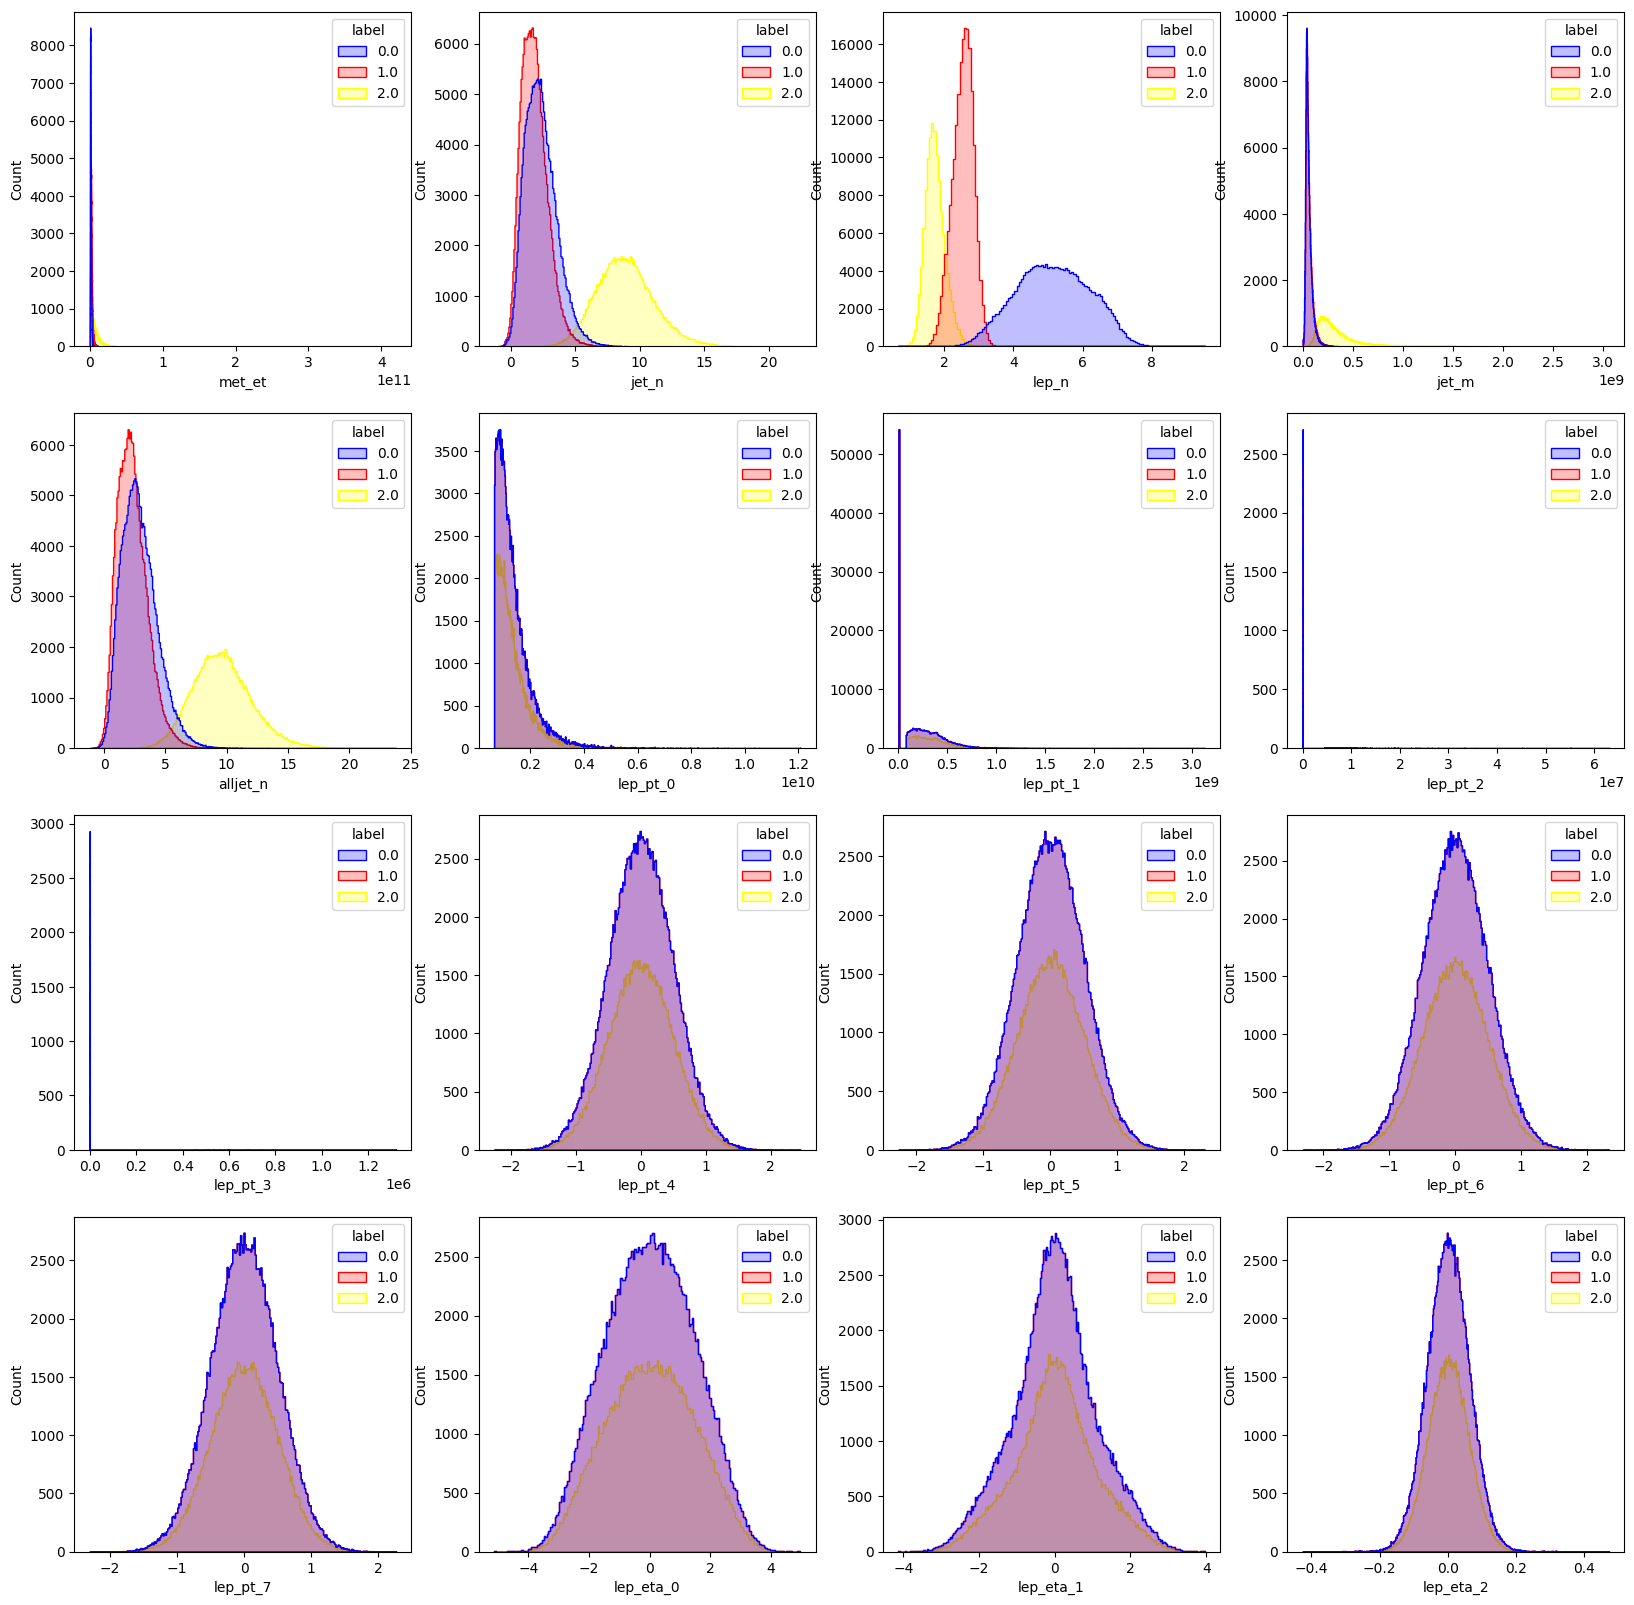

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(20,20))

for i, feature in enumerate(features[0:16]):
    row = i // 4
    col = i % 4
    print(row+col)
    sns.histplot(data=normalized_df, x=feature, hue=normalized_df["label"], ax=ax[row, col], palette = ["blue","red","yellow"], element="step")

In [12]:
df["label"] = df["label"].astype('category')
sns.histplot(data = df[features[0:5]],hue = df["label"]) # x=features[0:5], hue = df["label"])
plt.xlim(0,1e6)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [ ]:
features[0]

In [ ]:
features[0:2]

In [ ]:
df.hist(figsize = (50,50), column = features)#, by="label" )